In [6]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#load the data
df = pd.read_csv("C:/Users/admin/Desktop/Data Analysis Practice/week5_customer_reviews.csv")

#Understanding the Data
#1. What are the main columns in the dataset and what does each represent?

In [8]:
print("Main columns and their meanings:")
print("- review_id: Unique customer identifier")
print("- customer_name: Name of the customer ")
print("- raw_review: Original review text with potential special characters/emojis")
print("- product: Product being reviewed")
print("- rating: Numeric rating (1-5)")
print("- date: Date when review was posted")
print("- cleaned_review: [Empty in raw data, to be cleaned version of raw_review]")
print("- review_length: [Empty in raw data, to be calculated length of review]")

Main columns and their meanings:
- review_id: Unique customer identifier
- customer_name: Name of the customer 
- raw_review: Original review text with potential special characters/emojis
- product: Product being reviewed
- rating: Numeric rating (1-5)
- date: Date when review was posted
- cleaned_review: [Empty in raw data, to be cleaned version of raw_review]
- review_length: [Empty in raw data, to be calculated length of review]


#2. What are some examples of messy elements in the raw_review column?

In [9]:
print("\nExamples of messy elements in raw_review:")
print(df['raw_review'].head(3))


Examples of messy elements in raw_review:
0    Little understand try sell citizen create no m...
1                                  Hair emplo\(yee on.
2                        Five p~{}#layer rest himself.
Name: raw_review, dtype: object


The examples of messy elements include emojis, random punctuations. 

#3. How many unique products are reviewed in the dataset?

In [10]:
unique_products = df['product'].nunique()
print(f"\nNumber of unique products: {unique_products}") 
print("Product list:", df['product'].unique())


Number of unique products: 7
Product list: ['Toaster' 'Smartwatch' 'Phone Case' 'Headphones' 'Shoes' 'Blender' 'Mug']


#Cleaning Tasks
#1. How can you remove all special characters, emojis, and numbers from the raw_review column using Python?


In [ ]:
#import re
#re : This module provides regular expression matching operations. egular expressions can contain both special and ordinary characters.
import re #

In [12]:
# 1. Function to clean the raw_review text
def clean_review_text(text):
    if pd.isna(text):
        return ""
    # Remove emojis and special characters (keeping letters and basic punctuation)
    cleaned = re.sub(r'[^\w\s.,!?]', '', str(text)) # 
    # Replace multiple spaces with single space
    cleaned = re.sub(r'\s+', ' ', cleaned)
    # Strip leading/trailing spaces and lowercase
    cleaned = cleaned.strip().lower()
    return cleaned

# Apply cleaning function to create cleaned_review column
df['cleaned_review'] = df['raw_review'].apply(clean_review_text)

# 2. Function to strip spaces and lowercase
def preprocess_text(text):
    if pd.isna(text):
        return ""
    return ' '.join(str(text).split()).lower()



In [13]:
# 3. Show difference between raw and cleaned reviews
print("\nExamples of raw vs cleaned reviews:")
for i in range(3):
    print(f"\nOriginal {i+1}: {df['raw_review'].iloc[i]}")
    print(f"Cleaned {i+1}: {df['cleaned_review'].iloc[i]}")


Examples of raw vs cleaned reviews:

Original 1: Little understand try sell citizen create no million management community continue oil han️️\@🗑;🔥d team room.
Cleaned 1: little understand try sell citizen create no million management community continue oil hand team room.

Original 2: Hair emplo\(yee on.
Cleaned 2: hair employee on.

Original 3: Five p~{}#layer rest himself.
Cleaned 3: five player rest himself.


In [14]:
df.head()


,review_id,customer_name,raw_review,product,rating,date,cleaned_review,review_length
0,1,Craig Mckenzie,Little understand try sell citizen create no m...,Toaster,3.0,31/05/2025,little understand try sell citizen create no m...,NaN
1,2,Brian Coleman,Hair emplo\(yee on.,Smartwatch,3.0,02/06/2025,hair employee on.,NaN
2,3,Jeremy Price,Five p~{}#layer rest himself.,Smartwatch,4.0,01/05/2025,five player rest himself.,NaN
3,4,Jose Roth,Off try shake care health nation identify mode...,Phone Case,5.0,17/05/2025,off try shake care health nation identify mode...,NaN
4,5,Allen Sims,"New m~,(!🗑@!:~y sport management outside cente...",Headphones,3.0,19/05/2025,"new m,!!y sport management outside center age ...",NaN


2. Write a function in Python that strips extra spaces and lowercases the review text.
# Strip leading/trailing spaces and lowercase
cleaned = cleaned.strip().lower()

Cleaned is the variable for the new cleaned data with not leading /trailing spaces.
.strip() is the function used to remove extra spaces (leadin/trailing spaces).
.lower() is the function used to change the review text to lowercase.

# 3. What is the difference between raw_review and cleaned_review after text cleaning? Illustrate with 3 examples.

In [15]:
# Show difference between raw and cleaned reviews
print("\nExamples of raw vs cleaned reviews:")
for i in range(3):
    print(f"\nOriginal {i+1}: {df['raw_review'].iloc[i]}")
    print(f"Cleaned {i+1}: {df['cleaned_review'].iloc[i]}")


Examples of raw vs cleaned reviews:

Original 1: Little understand try sell citizen create no million management community continue oil han️️\@🗑;🔥d team room.
Cleaned 1: little understand try sell citizen create no million management community continue oil hand team room.

Original 2: Hair emplo\(yee on.
Cleaned 2: hair employee on.

Original 3: Five p~{}#layer rest himself.
Cleaned 3: five player rest himself.


#Creating New Columns
# 1. How would you compute the number of words in each review and store it in a new column review_length?


In [16]:
# 1. Compute review_length (number of words)
df['review_length'] = df['cleaned_review'].apply(lambda x: len(str(x).split()))
df['review_length']



0       15
1        3
2        4
3       19
4       19
        ..
4995     8
4996     4
4997     7
4998    13
4999     6
Name: review_length, Length: 5000, dtype: int64

# 2. Can you categorize reviews into ‘Positive’, ‘Neutral’, or ‘Negative’ using the rating column? Create a new column sentiment.

In [17]:
#Categorize sentiment based on rating
def categorize_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['sentiment'] = df['rating'].apply(categorize_sentiment)


In [18]:
df.head()

,review_id,customer_name,raw_review,product,rating,date,cleaned_review,review_length,sentiment
0,1,Craig Mckenzie,Little understand try sell citizen create no m...,Toaster,3.0,31/05/2025,little understand try sell citizen create no m...,15,Neutral
1,2,Brian Coleman,Hair emplo\(yee on.,Smartwatch,3.0,02/06/2025,hair employee on.,3,Neutral
2,3,Jeremy Price,Five p~{}#layer rest himself.,Smartwatch,4.0,01/05/2025,five player rest himself.,4,Positive
3,4,Jose Roth,Off try shake care health nation identify mode...,Phone Case,5.0,17/05/2025,off try shake care health nation identify mode...,19,Positive
4,5,Allen Sims,"New m~,(!🗑@!:~y sport management outside cente...",Headphones,3.0,19/05/2025,"new m,!!y sport management outside center age ...",19,Neutral


# 3. Which product received the most negative reviews (rating ≤ 2)?

In [19]:
#Product with most negative reviews
negative_reviews = df[df['sentiment'] == 'Negative']
product_negative_counts = negative_reviews['product'].value_counts()
most_negative_product = product_negative_counts.idxmax()

print(f"\nProduct with most negative reviews: {most_negative_product}")
print("Negative review counts by product:")
print(product_negative_counts)


Product with most negative reviews: Blender
Negative review counts by product:
product
Blender       316
Headphones    311
Toaster       289
Phone Case    288
Shoes         280
Mug           271
Smartwatch    264
Name: count, dtype: int64


# Summary & Insight
# 1. What’s the average review length for positive vs negative reviews?


In [21]:
#Positive review length
#Average review length by sentiment
avg_length_by_sentiment = df.groupby('sentiment')['review_length'].mean()
print("\nAverage review length by sentiment:")
print(avg_length_by_sentiment)


Average review length by sentiment:
sentiment
Negative    9.641902
Neutral     9.451135
Positive    9.531504
Name: review_length, dtype: float64


#2. Plot a bar chart showing the number of reviews per product. What insights can you draw?

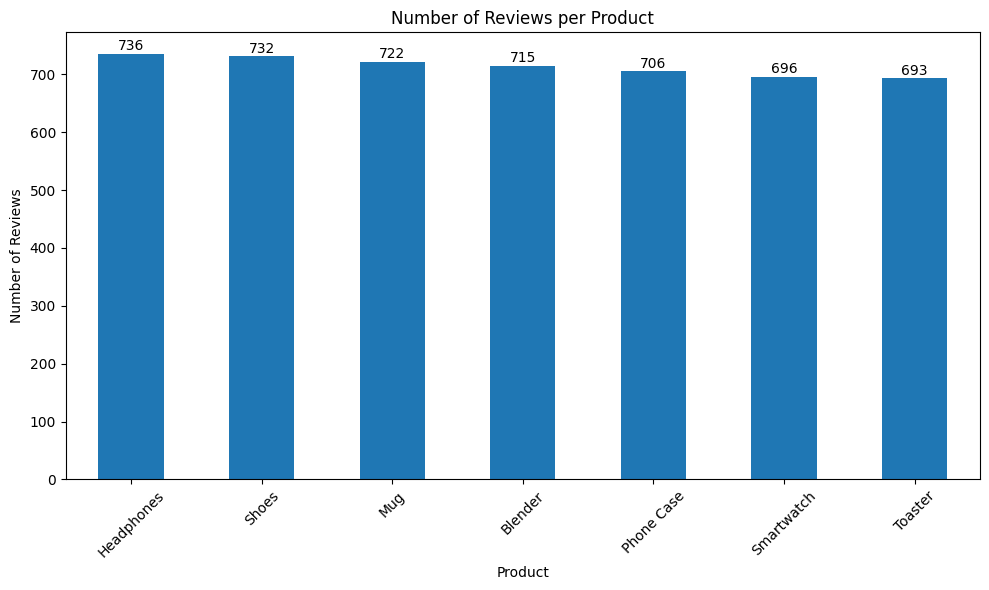

In [24]:
#Bar chart of reviews per product
product_counts = df['product'].value_counts()
plt.figure(figsize=(10, 6))
ax = product_counts.plot(kind='bar')
plt.title('Number of Reviews per Product')
plt.xlabel('Product')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
for i, v in enumerate(product_counts):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

- Headphones has the highest number of reviews (736) which shows it's most popular product, while Toaster has the least number of reviews (693) showing it's the least popular product.  
- Headphone with the highest reviews shows higher customer interest while toaster, with the least reviews shows low customer interest. 
- The reviews amongst the prodcuts have a small variation, this indicates balanced engagement. Because of this, the business can focus on maintaining overall product quality, use product reviews for targeted improvements and investigate why headphones receives most feedback and which reviews among positive, neutral and negative are more.

#3. Do longer reviews tend to be more positive or more negative based on the review_length and rating relationship?

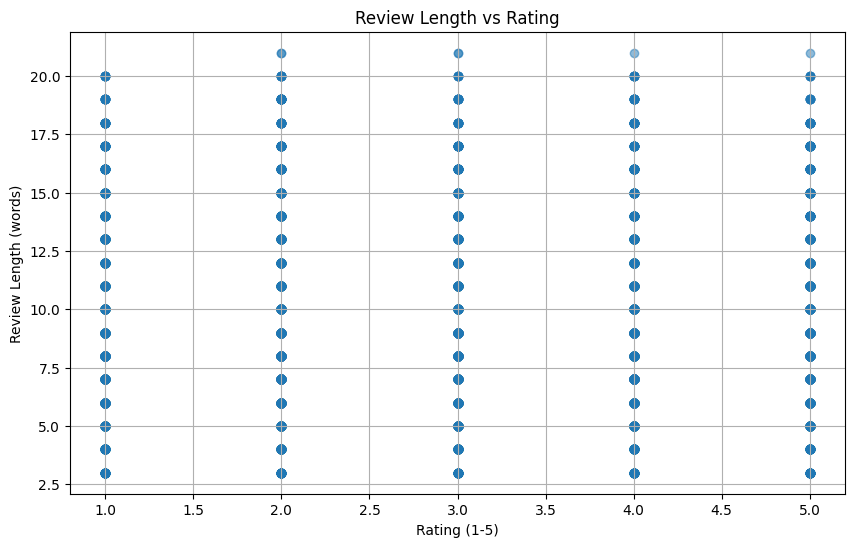


Correlation between review length and rating: -0.01


In [25]:
#Relationship between review length and rating
plt.figure(figsize=(10, 6))
plt.scatter(df['rating'], df['review_length'], alpha=0.5)
plt.title('Review Length vs Rating')
plt.xlabel('Rating (1-5)')
plt.ylabel('Review Length (words)')
plt.grid(True)
plt.show()

# Correlation between length and rating
correlation = df['review_length'].corr(df['rating'])
print(f"\nCorrelation between review length and rating: {correlation:.2f}")

- There is no strong relationship between review length and rating.
- Long and short reviews are equally likely to be positive (rating 5) or negative (rating 1).
- Correlation between review length and rating is -0.01. A correlation close to 0 (-0.01) which indicates a weak relationship between review length and rating. 

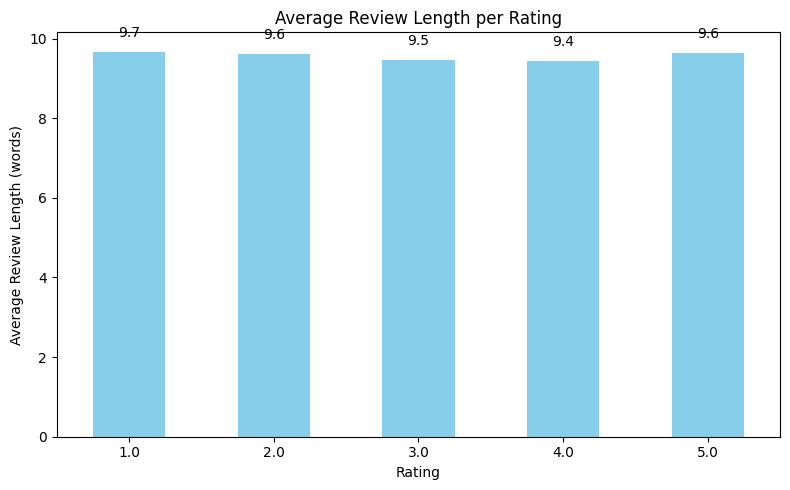

In [27]:
# Calculate average review length for each rating
avg_length = df.groupby('rating')['review_length'].mean()

# Plot it
plt.figure(figsize=(8, 5))
ax = avg_length.plot(kind='bar', color='skyblue')
plt.title('Average Review Length per Rating')
plt.xlabel('Rating')
plt.ylabel('Average Review Length (words)')
plt.xticks(rotation=0)
for i, v in enumerate(avg_length):
    ax.text(i, v + 0.3, f"{v:.1f}", ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_1680\1226623216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='review_length', data=df, palette='Set2')


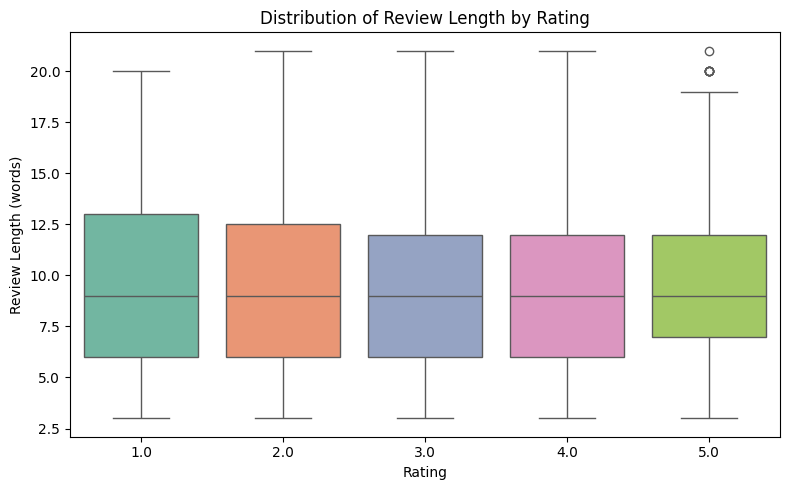

In [28]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='rating', y='review_length', data=df, palette='Set2')
plt.title('Distribution of Review Length by Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length (words)')
plt.tight_layout()
plt.show()


- There is no significant difference between the review length across different ratings (1-5). 
- Review lengths are fairly consistent regardless of rating, with similar medians, spreads, and ranges.